In [32]:
import pandas as pd
df = pd.read_csv('dane_wiki_final.csv')
df.info()
# errors in this row - looks like sentence is cut to one word only, list has length 1
df = df.drop(index=1528)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            2439 non-null   int64 
 1   term                  2439 non-null   object
 2   response_gpt3         2439 non-null   object
 3   pos_gpt3              2439 non-null   object
 4   response_gpt4         2439 non-null   object
 5   pos_gpt4              2439 non-null   object
 6   wiki_response_gpt3    2439 non-null   object
 7   wiki_pos_gpt3         2439 non-null   object
 8   wiki_response_gpt4    2439 non-null   object
 9   wiki_pos_gpt4         2439 non-null   object
 10  response_orca         2439 non-null   object
 11  pos_orca              2439 non-null   object
 12  wiki_response_orca    2439 non-null   object
 13  wiki_pos_orca         2439 non-null   object
 14  prompt                2439 non-null   object
 15  response_falcon       2439 non-null   

In [33]:
#text_columns = ["response_gpt3",  "wiki_response_gpt3", "response_gpt4", "wiki_response_gpt4", "response_orca", "wiki_response_orca",
#               "response_falcon", "wiki_response_falcon", "response_llama", "wiki_response_llama", "response_llama3", 
#               "wiki_response_llama3", "wiki_text_y", "sumy", "bart_sum", "text", "wiki_text", "ts_sum", "gensim_sum"]
text_columns = ["response_gpt3",  "wiki_response_gpt3", "response_gpt4", "wiki_response_gpt4", "response_orca", "wiki_response_orca",
               "response_falcon", "wiki_response_falcon", "response_llama", "wiki_response_llama", "response_llama3", 
               "wiki_response_llama3", "wiki_text_y", "bart_sum", "gensim_sum"]

text_columns_renamed = {
    'response_gpt3': 'GPT3', 
    'wiki_response_gpt3': 'wiki_GPT3',
    'response_gpt4':'GPT4',
    'wiki_response_gpt4': 'wiki_GPT4',
    'response_orca':'Orca', 
    'wiki_response_orca': 'wiki_Orca', 
    'response_falcon': 'Falcon',
    'wiki_response_falcon': 'wiki_Falcon', 
    'response_llama':'Llama',
    'wiki_response_llama':'wiki_Llama', 
    'response_llama3':'Llama3',
    'wiki_response_llama3':'wiki_Llama3',
    'wiki_text_y': 'Wikipedia', 
    'bart_sum': 'Bart', 
    'gensim_sum' : 'Gensim'}

df_text = df[text_columns]

df_text = df_text.rename(columns=text_columns_renamed)

In [34]:
import os

# save sample of data to be used in thesis
sample_text = 'sample_text.csv'
sample_df_text = df_text.iloc[0:1].to_csv(sample_text, index=False)

MAL

Paragraph - Sentence - Word - Syllable - Phoneme

In [35]:
from helpers.TextManipulations import split_text_into_sentences
from helpers.TextManipulations import perform_text_preprocessing
from algorithms.MAL.MAL import create_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import perform_word_split
from algorithms.MAL.MAL import create_words_length_in_sentence_dict
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import print_sorted
from algorithms.MAL.MAL import perform_syllable_split
from algorithms.MAL.MAL import create_words_length_in_sentence_dict
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import perform_phoneme_split
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import find_A_b_numerically_truncated
from algorithms.MAL.MAL import find_A_b_numerically_full



def perform_mal(paragraphs)-> float:
    #print("Paragraphs")
    #print(paragraphs)
    sentences = [split_text_into_sentences(element) for element in paragraphs]
    #print("Sentences")
    #print(sentences)
    sentences_normalized = [[perform_text_preprocessing(string) for string in inner_list] for inner_list in sentences]
    #print("Sentences Normalized")
    #print(sentences_normalized)
    sentences_dict = create_sentences_length_in_paragraph_dict(sentences_normalized)
    #print("Sentences Dict")
    #print(sentences_dict)
    sentences_dict_split = perform_word_split(sentences_dict)
    #print("sentences_dict_split")
    #print(sentences_dict_split)
    words_dict = create_words_length_in_sentence_dict(sentences_dict_split)
    words_dict.pop(0, None) # remove sentence of length zero if encountered
    #print("words_dict")
    #print(words_dict)
    sentences_dict_split_counted = count_sentences_length_in_paragraph_dict(sentences_dict_split) 
    #print("sentences_dict_split_counted")
    #print(sentences_dict_split_counted)
    sentences_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(sentences_dict_split_counted) 

    # Level 1: Paragraph - Sentence - Word (X_1, Y_1)
    X_1_Y_1 = average_sentences_length_in_paragraph_dict(sentences_dict_split_counted_average_single) 
    # print_sorted(X_1_Y_1)
    # Level 2: Sentence - Word - Syllable (X_2, Y_2)
    words_dict_split = perform_syllable_split(words_dict)
    syllables_dict = create_words_length_in_sentence_dict(words_dict_split) 
    words_dict_split_counted = count_sentences_length_in_paragraph_dict(words_dict_split) 
    words_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(words_dict_split_counted) 
    X_2_Y_2 = average_sentences_length_in_paragraph_dict(words_dict_split_counted_average_single) 
    # print_sorted(X_2_Y_2)
    syllables_dict_split = perform_phoneme_split(syllables_dict)
    syllables_dict_split_counted = count_sentences_length_in_paragraph_dict(syllables_dict_split) 

    # Level 3: Word - Syllable - Phoneme (X_3, Y_3)
    syllables_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(syllables_dict_split_counted) 
    X_3_Y_3 = average_sentences_length_in_paragraph_dict(syllables_dict_split_counted_average_single) 
    #print_sorted(X_3_Y_3)

    a_1, b_1 = find_A_b_numerically_truncated(X_1_Y_1)
    #print(b_1)
    a_2, b_2 = find_A_b_numerically_truncated(X_2_Y_2)
    #print(b_2)
    a_3, b_3 = find_A_b_numerically_truncated(X_3_Y_3)
    #print(b_3)

    D_trun = 3 / (b_1 + b_2 + b_3)

    a_1, b_1, c_1 = find_A_b_numerically_full(X_1_Y_1)
    #print(b_1)
    a_2, b_2, c_2 = find_A_b_numerically_full(X_2_Y_2)
    #print(b_2)
    a_3, b_3, c_3 = find_A_b_numerically_full(X_3_Y_3)
    #print(b_3)

    D_full = 3 / (b_1 + b_2 + b_3)
    return D_trun, D_full

In [36]:
def clean_and_convert_to_list(series):
    nonan_series = series.dropna()
    result = nonan_series.astype(str).values.flatten().tolist()
    return result

In [37]:
D_trun_s, D_full_s = zip(*[perform_mal(clean_and_convert_to_list(df[column])) for column in text_columns])
print(D_trun_s)
print(D_full_s)

/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in multiply
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in multiply
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena

(7.635130099755828, 6.762130462576433, 4.906105945598152, 4.252187298906017, 5.634261450173764, 7.7732902189700965, 6.040038749349263, 4.526408022184367, 5.693638756296708, 5.2669014946495505, 7.801850542623138, 7.62600040859855, 3.8672955752764415, 3.1461641262759246, 10.265167231018722)
(1.7319335798118896, 3.4059144655700857, -27.56221031055833, -332.0938631665155, 10.23322566539091, -10.07089487454804, -9.471826509997278, -65.71363220516754, -19.980794456008542, -3.160791375165371, 24.842133678298136, 7.375975143348243, 3.185641077497482, 2.955990858973552, 6.649823206955635)


/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in multiply
  return a * pow(x, -b) * np.exp(-c * x)


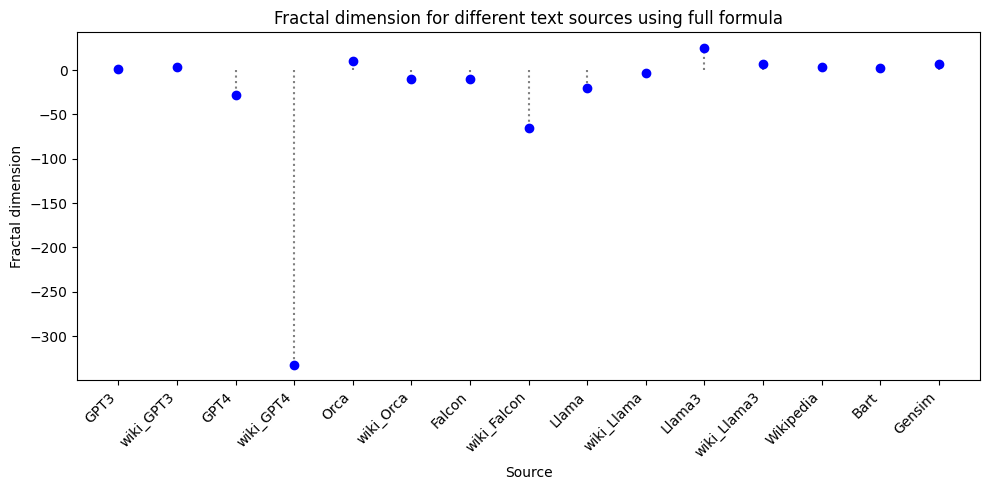

In [38]:
import matplotlib.pyplot as plt

def plot_scatter(D_s, text_coulmns, title, algorithm):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(D_s)), D_s, color='blue', zorder=5)

    plt.xticks(range(len(text_coulmns)), [text_columns_renamed.get(key, key) for key in text_coulmns], rotation=45, ha="right")

    plt.xlabel('Source')
    plt.ylabel('Fractal dimension')
    plt.title(title)
    
    for i, label in enumerate(text_coulmns):
        plt.vlines(i, ymin=0, ymax=D_s[i], colors='gray', linestyles='dotted')

    plt.tight_layout()
    plt.savefig(f'dane_wiki_final_{algorithm}.png')
    plt.show()

#plot_scatter(D_trun_s, text_columns, 'Fractal dimension for different text sources using truncated formula', 'MAL')
plot_scatter(D_full_s, text_columns, 'Fractal dimension for different text sources using full formula', 'MAL')

Partition Data

In [39]:
def apply_MAL_in_partitions(df, text_columns, partition_length, perform_mal):
    results = {}
    for column in text_columns:
        column_nonan = df[column].fillna('')
        col_values = clean_and_convert_to_list(df[column])      

        partitions = [col_values[i:i + partition_length] for i in range(0, len(col_values), partition_length)]

        for idx, partition in enumerate(partitions):
            results[(column, idx)] = perform_mal(partition)
    return results

In [40]:
partition_length = 700
D_s = apply_MAL_in_partitions(df, text_columns, partition_length, perform_mal)
print(D_s)

/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in multiply
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in multiply
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:138: RuntimeWarning: overflow encountered in exp
  return a * pow(x, -b) * np.exp(-c * x)
/home/magdalena

NameError: name 'results_full' is not defined

In [41]:
import matplotlib.pyplot as plt

def bar_plot(results):
    plt.figure(figsize=(12, 6))
    labels = [f"{col}_part{i}" for col, i in results.keys()]
    values = list(results.values())

    plt.bar(range(len(results)), values, color='blue', alpha=0.7)
    plt.xlabel('Partition')
    plt.ylabel('Result from MAL')
    plt.title('Results of MAL Applied to Partitions of Columns')
    plt.xticks(range(len(results)), labels, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [42]:
#bar_plot(D_s)

Data with pos to list transformation

In [43]:
#pos_columns = ["pos_gpt3", "wiki_pos_gpt3", "pos_gpt4", "wiki_pos_gpt4", "pos_orca", "wiki_pos_orca", "pos_falcon",
#               "wiki_pos_falcon", "pos_llama", "wiki_pos_llama", "pos_llama3", "wiki_pos_llama3", "text_pos", "sumy_pos",
#              "bart_pos", "ts_pos", "gensim_pos"]

pos_columns = ["pos_gpt3", "wiki_pos_gpt3", "pos_gpt4", "wiki_pos_gpt4", "pos_orca", "wiki_pos_orca", "pos_falcon",
               "wiki_pos_falcon", "pos_llama", "wiki_pos_llama", "pos_llama3", "wiki_pos_llama3", "text_pos",
              "bart_pos", "gensim_pos"]

dict_pos_to_response = {
    "pos_gpt3": "response_gpt3",
    "wiki_pos_gpt3": "wiki_response_gpt3",
    "pos_gpt4":"response_gpt4",
    "wiki_pos_gpt4":"wiki_response_gpt4",
    "pos_orca":"response_orca",
    "wiki_pos_orca":"wiki_response_orca",
    "pos_falcon":"response_falcon",
    "wiki_pos_falcon":"wiki_response_falcon",
    "pos_llama":"response_llama",
    "wiki_pos_llama":"wiki_response_llama",
    "pos_llama3":"response_llama3",
    "wiki_pos_llama3":"wiki_response_llama3",
    "text_pos":"text",
    "bart_pos":"bart_sum",
    "gensim_pos":"gensim_sum"
}

pos_df = df[pos_columns]
pos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         2438 non-null   object
 1   wiki_pos_gpt3    2438 non-null   object
 2   pos_gpt4         2438 non-null   object
 3   wiki_pos_gpt4    2438 non-null   object
 4   pos_orca         2438 non-null   object
 5   wiki_pos_orca    2438 non-null   object
 6   pos_falcon       2438 non-null   object
 7   wiki_pos_falcon  2438 non-null   object
 8   pos_llama        2438 non-null   object
 9   wiki_pos_llama   2438 non-null   object
 10  pos_llama3       2438 non-null   object
 11  wiki_pos_llama3  2438 non-null   object
 12  text_pos         2438 non-null   object
 13  bart_pos         2438 non-null   object
 14  gensim_pos       2438 non-null   object
dtypes: object(15)
memory usage: 304.8+ KB


In [44]:
import ast

# util function to convert list in a cell to python list
def convert_to_list(cell):
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        return cell

pos_df_list = pos_df.applymap(convert_to_list) 
pos_df_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         2438 non-null   object
 1   wiki_pos_gpt3    2438 non-null   object
 2   pos_gpt4         2438 non-null   object
 3   wiki_pos_gpt4    2438 non-null   object
 4   pos_orca         2438 non-null   object
 5   wiki_pos_orca    2438 non-null   object
 6   pos_falcon       2438 non-null   object
 7   wiki_pos_falcon  2438 non-null   object
 8   pos_llama        2438 non-null   object
 9   wiki_pos_llama   2438 non-null   object
 10  pos_llama3       2438 non-null   object
 11  wiki_pos_llama3  2438 non-null   object
 12  text_pos         2438 non-null   object
 13  bart_pos         2438 non-null   object
 14  gensim_pos       2438 non-null   object
dtypes: object(15)
memory usage: 304.8+ KB


Utility functions

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def box_plot(df, algorithm):
    plt.figure(figsize=(17, 12))
    df.boxplot()
    plt.title(f'Hurst exponent for different text sources calculated using {algorithm}')
    plt.xlabel('Source')
    plt.ylabel('Hurst exponent')
    plt.xticks(rotation=45)  # Rotate column labels if needed
    plt.savefig(f'Box_plot_{algorithm}.png')
    plt.show()

In [46]:
import numpy as np

def find_outliers(df, bound_limit):
    outliers_dict = {}
    median_dict = {}
    for col in df.columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - bound_limit * IQR
        upper_bound = Q3 + bound_limit * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outliers_dict[col] = outliers
    return outliers_dict

In [47]:
def print_outliers(df, outliers):
    for col, outlier_indices in outliers.items():
        print(f"Column {col} outlier indices: {outlier_indices}")
        print(f"Column {col} outlier values pos: {df[col][outlier_indices].tolist()}")
        print(f"Column {col} outlier values text: {df[dict_pos_to_response.get(col)][outlier_indices].tolist()}")

DFA (each cell separately)

In [48]:
from helpers.TimeSeries import construct_its
from algorithms.DFA.DFA import perform_dfa

def dfa_calculate_cell_pos(cell, ranges):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    estimated_h = perform_dfa(its, ranges)
    return estimated_h

In [49]:
from helpers.TimeSeries import construct_its
from algorithms.DFA.DFA import perform_dfa
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TextManipulations import tokenize_text
from helpers.TimeSeries import construct_fts_from_tokens



def dfa_calculate_cell_fts(cell, ranges):
    #print(cell)
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    fts = construct_fts_from_tokens(token_words)
    its = construct_its(fts)
    estimated_h = perform_dfa(its, ranges)
    return estimated_h

In [50]:
from helpers.TimeSeries import construct_its
from algorithms.DFA.DFA import perform_dfa
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TextManipulations import tokenize_text
from helpers.TimeSeries import construct_lts_from_tokens



def dfa_calculate_cell_lts(cell, ranges):
    #print(cell)
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    lts = construct_lts_from_tokens(token_words)
    its = construct_its(lts)
    estimated_h = perform_dfa(its, ranges)
    return estimated_h

In [51]:
import os

h_df_filename_dfa = 'h_df_dfa_pos.csv'

def load_or_create_h_df_filename_dfa_pos(pos_df_list):
    if os.path.exists(h_df_filename_dfa):
        h_df = pd.read_csv(h_df_filename_dfa)
    else:
        h_df = pos_df_list.applymap(lambda x: dfa_calculate_cell_pos(x, [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]))   
        h_df.to_csv(h_df_filename_dfa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [52]:
h_df_dfa_pos = load_or_create_h_df_filename_dfa_pos(pos_df_list)
h_df_dfa_pos.info()
h_df_dfa_pos.head()

Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (

,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.295216,0.381857,0.418891,0.601830,0.188170,0.838207,2.130618e-01,2.895947e-01,0.159007,0.361985,0.326558,0.526104,0.554811,1.452425e-30,0.505963
1,0.109195,0.265351,0.503666,0.285744,0.746483,0.150467,2.559264e-01,3.916509e-01,0.675740,0.386294,0.031828,0.181669,0.327086,2.904851e-30,0.000000
2,0.505913,0.179247,0.128451,0.423858,0.305874,0.982723,5.809701e-30,1.928404e-01,0.480149,0.824079,0.125245,0.212541,0.795672,2.076531e-01,0.682235
3,0.397507,0.468029,0.356995,0.147478,0.277252,0.519751,1.050992e-01,4.971251e-01,0.657234,0.297618,0.221472,0.351071,0.580457,-1.452425e-30,0.122587
4,0.099612,0.186547,0.215006,0.250259,0.695343,0.560248,3.800084e-02,1.452425e-30,0.663145,0.568426,0.127102,0.480542,0.457109,-1.452425e-30,NaN


In [53]:
import os
import pandas as pd

h_df_filename_dfa = 'h_df_dfa_fts.csv'

def load_or_create_h_df_filename_dfa_fts(df_text):
    if os.path.exists(h_df_filename_dfa):
        h_df = pd.read_csv(h_df_filename_dfa)
    else:
        h_df = df_text.applymap(lambda x: dfa_calculate_cell_fts(x, [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]) if pd.notnull(x) else x)   
        h_df.to_csv(h_df_filename_dfa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [54]:
h_df_dfa_fts = load_or_create_h_df_filename_dfa_fts(df_text)
h_df_dfa_fts.info()
h_df_dfa_fts.head()

/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/DFA/DFA.py:115: RuntimeWarning: divide by zero encountered in log
  log_F_values = np.log(dfa_fluctuations)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/DFA/DFA.py:115: RuntimeWarning: divide by zero encountered in log
  log_F_values = np.log(dfa_fluctuations)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/DFA/DFA.py:38: RankWarning: Polyfit may be poorly conditioned
  trend_line = calculate_local_trend_order_n(segment, 3)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementac

DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2435 non-null   float64
 5   wiki_Orca    2429 non-null   float64
 6   Falcon       2432 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2437 non-null   float64
 10  Llama3       2437 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart         2437 non-null   float64
 14  Gensim       2387 non-null   float64
dtypes: float64(15)
memory usage: 304.8 KB


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.304739,0.559487,0.528060,0.562559,0.592620,0.648880,2.467507e-02,1.126402e-01,0.709500,1.066741,0.212841,0.544139,0.595657,0.000000e+00,0.317296
1,0.489200,0.021847,0.451414,0.436026,0.407695,0.332318,-7.262126e-31,3.594517e-01,0.117175,0.280180,0.668780,0.211093,0.476450,0.000000e+00,0.000000
2,0.405064,0.382142,0.380531,0.430142,0.054024,0.789995,0.000000e+00,3.096239e-01,0.209675,0.772765,0.675389,0.499844,0.305561,1.452425e-30,0.220777
3,0.349791,0.244280,0.365846,0.404245,0.539406,0.482742,2.904851e-30,4.521309e-01,0.868278,0.277414,0.095524,0.270744,0.613016,0.000000e+00,0.261371
4,0.056825,0.097273,0.577422,0.077574,0.742354,0.111765,-1.089319e-30,1.815532e-31,0.773914,1.043265,0.246712,0.351780,0.000000,-7.262126e-31,NaN


In [55]:
import os
import pandas as pd

h_df_filename_dfa = 'h_df_dfa_lts.csv'

def load_or_create_h_df_filename_dfa_lts(df_text):
    if os.path.exists(h_df_filename_dfa):
        h_df = pd.read_csv(h_df_filename_dfa)
    else:
        h_df = df_text.applymap(lambda x: dfa_calculate_cell_lts(x, [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]) if pd.notnull(x) else x)   
        h_df.to_csv(h_df_filename_dfa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [56]:
h_df_dfa_lts = load_or_create_h_df_filename_dfa_lts(df_text)
h_df_dfa_lts.info()
h_df_dfa_lts.head()

/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/DFA/DFA.py:38: RankWarning: Polyfit may be poorly conditioned
  trend_line = calculate_local_trend_order_n(segment, 3)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/DFA/DFA.py:38: RankWarning: Polyfit may be poorly conditioned
  trend_line = calculate_local_trend_order_n(segment, 3)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/DFA/DFA.py:38: RankWarning: Polyfit may be poorly conditioned
  trend_line = calculate_local_trend_order_n(segment, 3)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/DFA/DFA.py:38: RankWarning: Polyfit may be poorly conditioned
  trend_line = calculate_local_trend_order_n(segment, 3)
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/DFA/DFA.py:38: RankWarning: Polyfit may be poorly cond

DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2438 non-null   float64
 5   wiki_Orca    2438 non-null   float64
 6   Falcon       2438 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2438 non-null   float64
 10  Llama3       2438 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart         2438 non-null   float64
 14  Gensim       2418 non-null   float64
dtypes: float64(15)
memory usage: 304.8 KB


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.377155,0.245918,0.608414,0.089063,0.564438,0.070236,1.069309e-01,1.506353e-01,0.101168,0.158623,0.479052,0.181187,0.262564,0.000000e+00,5.950458e-01
1,0.423362,0.378989,0.328534,0.577237,0.719658,0.018761,1.452425e-30,9.590149e-02,0.532725,0.330715,0.282297,0.164812,0.779293,0.000000e+00,1.452425e-30
2,0.245847,0.241022,0.589727,0.335445,0.200166,0.454132,-1.452425e-30,2.775068e-01,0.465757,0.415974,0.289737,0.151935,0.638656,-1.452425e-30,2.087373e-01
3,0.302994,0.158854,0.222813,0.486173,0.502304,0.794919,0.000000e+00,3.371732e-01,0.348857,1.085827,0.166907,0.288013,0.584384,0.000000e+00,2.149022e-01
4,0.323185,0.123640,0.711732,-0.043079,0.458682,0.109440,1.452425e-30,7.262126e-31,0.537203,0.390512,0.598620,0.219029,0.000000,-1.452425e-30,NaN


In [57]:
outliers = find_outliers(h_df_dfa_pos, 3)
print_outliers(df, outliers)

Column pos_gpt3 outlier indices: []
Column pos_gpt3 outlier values pos: []
Column pos_gpt3 outlier values text: []
Column wiki_pos_gpt3 outlier indices: [48]
Column wiki_pos_gpt3 outlier values pos: ['[13, 13, 13, 4, 7, 1, 9, 6, 9, 17, 2, 12, 9, 2, 9, 11, 6, 1, 9, 9, 14, 12, 4, 17, 2, 13, 10, 14, 10, 14, 2, 13, 14, 13, 14, 9, 17, 9, 2, 12, 9, 14, 13, 13, 14, 14, 12, 17, 7, 1, 13, 13, 2, 10, 14, 12, 9, 9, 4, 3, 17, 2, 1, 6, 1, 14, 2, 7, 9, 2, 7, 9, 2, 1, 9, 14, 9, 17, 7, 9, 2, 1, 9, 6, 3, 17, 9, 2, 12, 9, 14, 2, 9, 2, 9, 9, 14, 12, 4, 3, 17, 9, 9, 2, 1, 9, 14, 20, 9, 4, 17, 1, 9, 2, 12, 9, 14, 17, 7, 13, 13, 13, 2, 13, 13, 6, 1, 13, 13, 13, 9, 14, 12, 4, 17, 2, 12, 9, 11, 17, 7, 9, 2, 9, 6, 7, 9, 2, 1, 9, 2, 17, 12, 11, 9, 14, 9, 17, 7, 1, 9, 9, 12, 9, 17, 2, 9, 14, 17, 7, 9, 9, 9, 14, 12, 9, 3, 17, 9, 2, 9, 14, 9, 14, 6, 9, 14, 9, 2, 7, 1, 6, 1, 9, 14, 13, 13, 13, 17, 11, 4, 7, 1, 9, 2, 7, 9, 2, 9, 11, 9, 14, 17, 9, 2, 7, 9, 2, 12, 9, 9, 6, 1, 9, 14]']
Column wiki_pos_gpt3 outlier valu

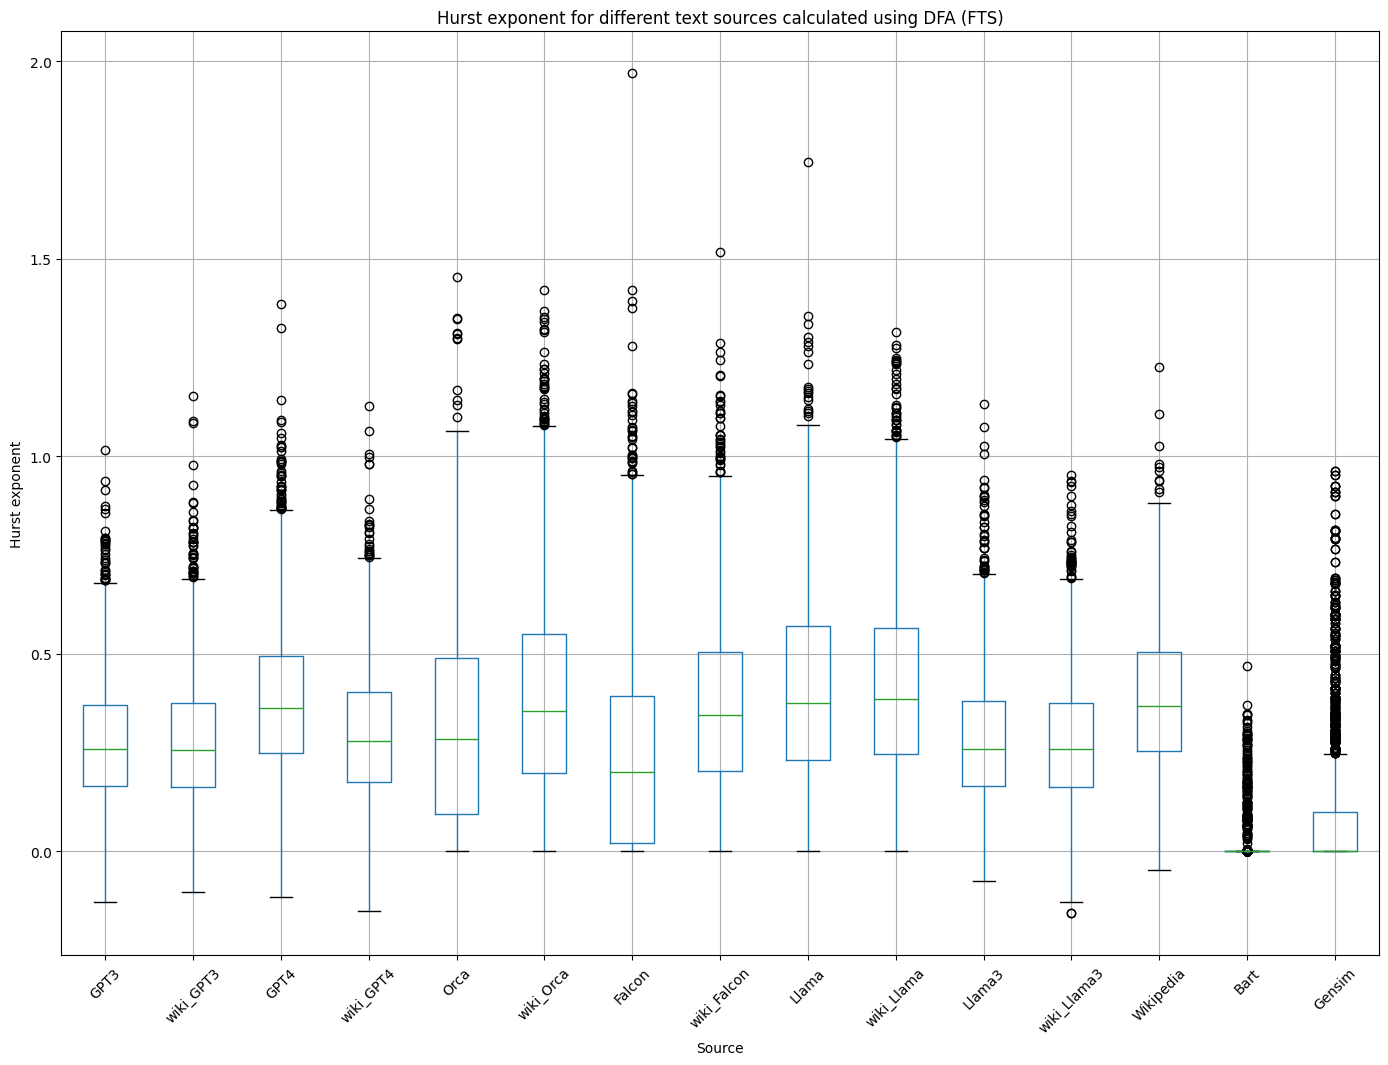

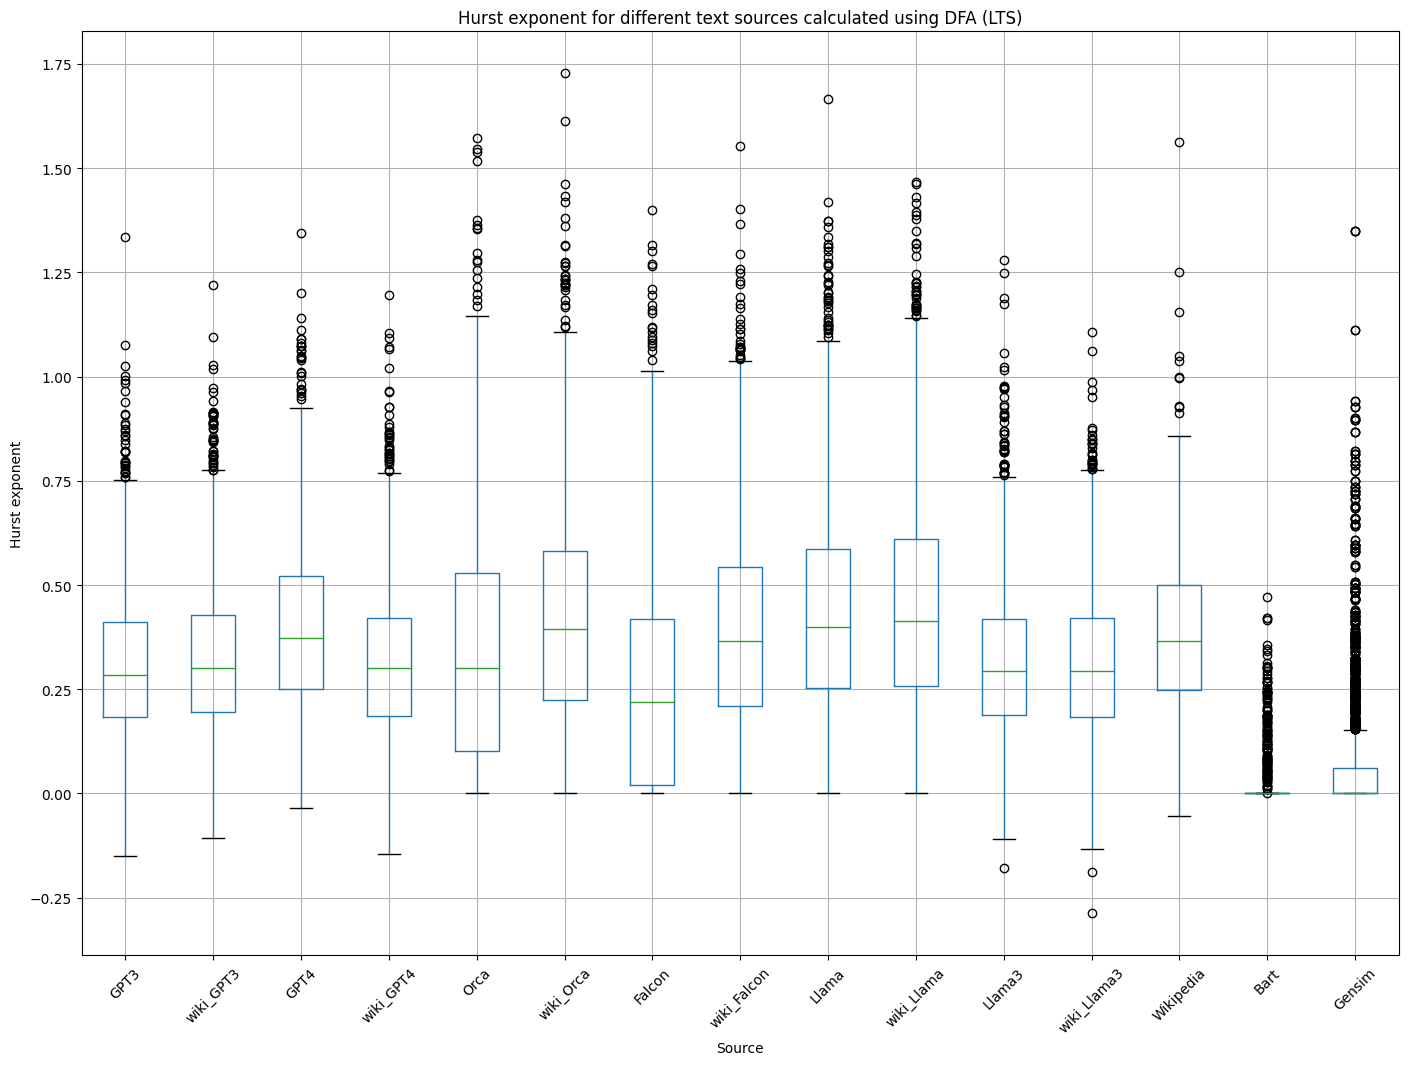

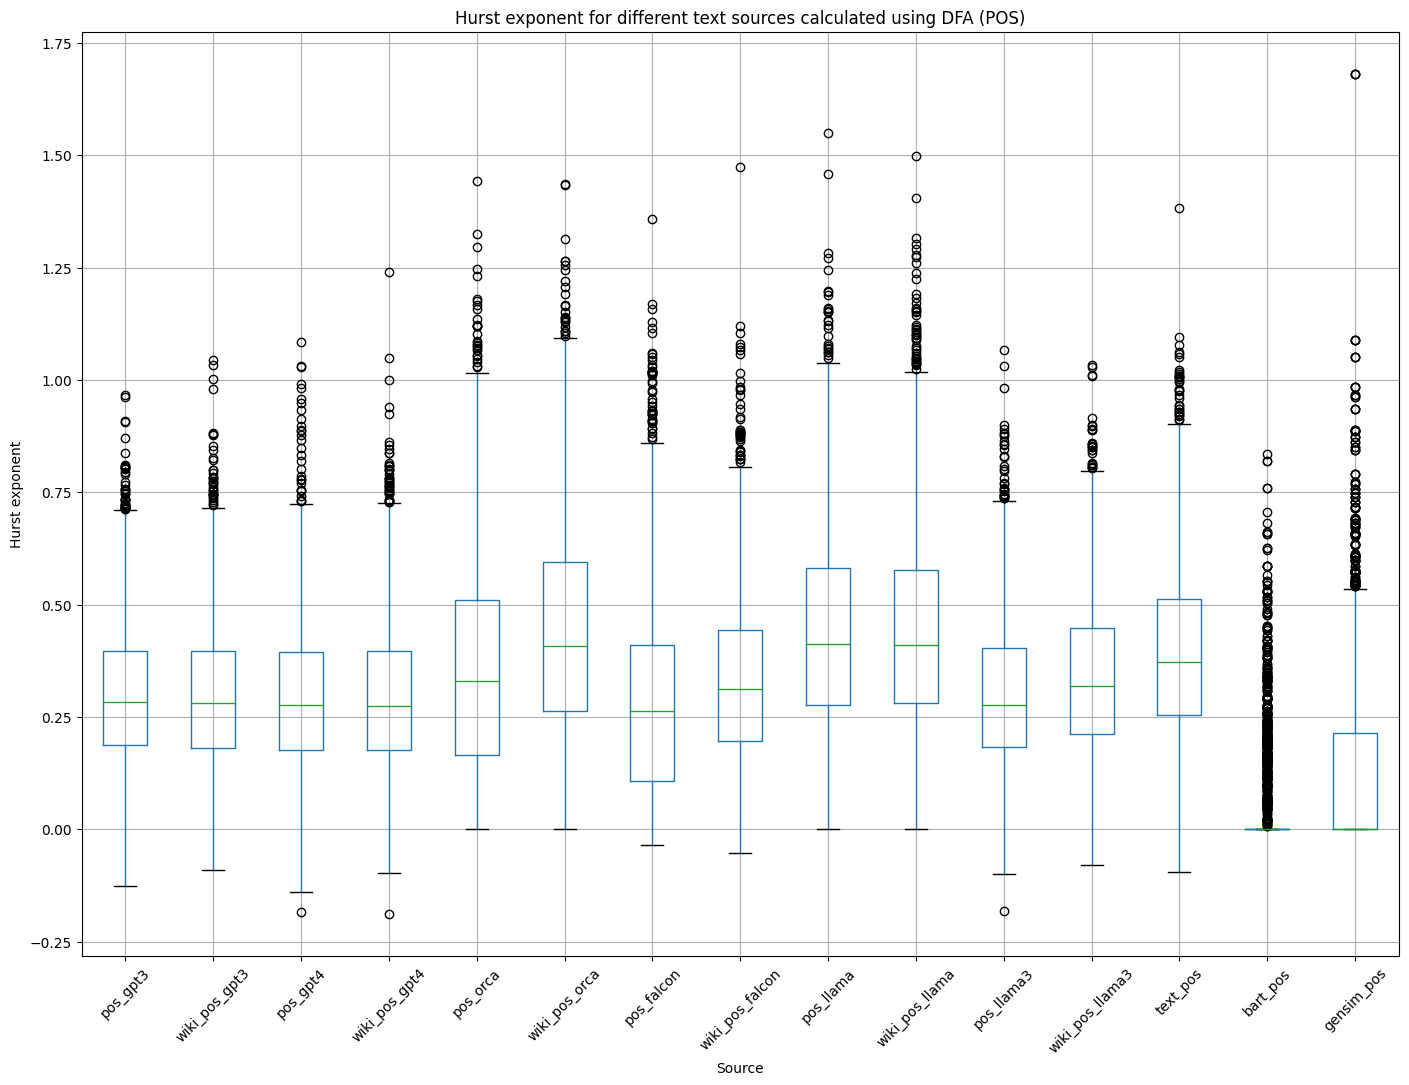

In [58]:
box_plot(h_df_dfa_fts, 'DFA (FTS)')
box_plot(h_df_dfa_lts, 'DFA (LTS)')
box_plot(h_df_dfa_pos, 'DFA (POS)')

AFA

In [59]:
from helpers.TimeSeries import construct_its
from algorithms.AFA.AFA import perform_afa

def afa_calculate_cell_pos(cell, ranges):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    estimated_h = perform_afa(its, ranges)
    return estimated_h

In [60]:
from helpers.TimeSeries import construct_its
from algorithms.AFA.AFA import perform_afa
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TextManipulations import tokenize_text
from helpers.TimeSeries import construct_fts_from_tokens



def afa_calculate_cell_fts(cell, ranges):
    #print(cell)
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    fts = construct_fts_from_tokens(token_words)
    its = construct_its(fts)
    estimated_h = perform_afa(its, ranges)
    return estimated_h

In [61]:
from helpers.TimeSeries import construct_its
from algorithms.AFA.AFA import perform_afa
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TextManipulations import tokenize_text
from helpers.TimeSeries import construct_lts_from_tokens



def afa_calculate_cell_lts(cell, ranges):
    #print(cell)
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    lts = construct_lts_from_tokens(token_words)
    its = construct_its(lts)
    estimated_h = perform_afa(its, ranges)
    return estimated_h

In [64]:
import os

h_df_filename_afa_pos = 'h_df_afa_pos.csv'

def load_or_create_h_df_filename_afa_pos(pos_df_list):
    if os.path.exists(h_df_filename_afa_pos):
        h_df = pd.read_csv(h_df_filename_afa_pos)
    else:
        h_df = pos_df_list.applymap(lambda x: afa_calculate_cell_pos(x, [60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140]))    
        h_df.to_csv(h_df_filename_afa_pos, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [65]:
h_df_afa_pos = load_or_create_h_df_filename_afa_pos(pos_df_list)
h_df_afa_pos.info()
h_df_afa_pos.head()

/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scal

Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (

,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.532546,0.436250,0.303871,0.429700,0.221353,0.580974,NaN,NaN,NaN,0.178265,0.479785,0.659370,0.472562,NaN,0.603071
1,0.453310,0.266022,0.681012,0.123882,0.541234,0.199980,NaN,0.214876,0.683604,0.235590,0.283342,0.193900,0.445512,NaN,NaN
2,0.437601,0.293770,0.223493,0.271244,0.270893,0.956700,NaN,0.259215,0.366218,0.591632,0.282778,0.466844,0.553673,NaN,NaN
3,0.347214,0.467346,0.541094,0.194443,0.266935,0.441445,NaN,0.644732,0.765492,0.112851,0.171658,0.227843,0.463460,NaN,NaN
4,0.260626,0.199304,NaN,0.396392,NaN,0.279146,NaN,NaN,NaN,0.303460,0.227014,0.856329,NaN,NaN,NaN


In [68]:
import os

h_df_filename_afa_lts = 'h_df_afa_lts.csv'

def load_or_create_h_df_filename_afa_lts(df_text):
    if os.path.exists(h_df_filename_afa_lts):
        h_df = pd.read_csv(h_df_filename_afa_lts)
    else:
        h_df = df_text.applymap(lambda x: afa_calculate_cell_lts(x, [60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140]) if pd.notnull(x) else x)    
        h_df.to_csv(h_df_filename_afa_lts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [69]:
h_df_afa_lts = load_or_create_h_df_filename_afa_lts(df_text)
h_df_afa_lts.info()
h_df_afa_lts.head()

/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scal

DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2416 non-null   float64
 1   wiki_GPT3    2383 non-null   float64
 2   GPT4         2247 non-null   float64
 3   wiki_GPT4    2416 non-null   float64
 4   Orca         357 non-null    float64
 5   wiki_Orca    454 non-null    float64
 6   Falcon       692 non-null    float64
 7   wiki_Falcon  1515 non-null   float64
 8   Llama        587 non-null    float64
 9   wiki_Llama   627 non-null    float64
 10  Llama3       2420 non-null   float64
 11  wiki_Llama3  2431 non-null   float64
 12  Wikipedia    917 non-null    float64
 13  Bart         0 non-null      float64
 14  Gensim       45 non-null     float64
dtypes: float64(15)
memory usage: 369.3 KB


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.706805,0.303046,0.550088,0.541330,NaN,NaN,NaN,NaN,NaN,NaN,0.271884,0.149782,0.239041,NaN,0.378908
1,0.268186,0.349261,0.195501,0.750952,0.480004,NaN,NaN,0.159402,NaN,NaN,0.383149,0.361483,0.843058,NaN,NaN
2,0.331871,0.088054,0.403207,0.605636,NaN,NaN,NaN,0.341082,NaN,NaN,0.139742,0.403457,0.773092,NaN,NaN
3,0.153391,0.162121,0.216644,0.375679,NaN,0.508095,NaN,0.184839,NaN,NaN,0.112703,0.289456,0.350530,NaN,NaN
4,0.203065,0.374773,NaN,0.762787,NaN,0.227644,NaN,NaN,NaN,NaN,0.505352,0.595655,NaN,NaN,NaN


In [72]:
import os

h_df_filename_afa_fts = 'h_df_afa_fts.csv'

def load_or_create_h_df_filename_afa_fts(df_text):
    if os.path.exists(h_df_filename_afa_fts):
        h_df = pd.read_csv(h_df_filename_afa_fts)
    else:
        h_df = df_text.applymap(lambda x: afa_calculate_cell_fts(x, [60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140])if pd.notnull(x) else x)    
        h_df.to_csv(h_df_filename_afa_fts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [73]:
h_df_afa_fts = load_or_create_h_df_filename_afa_fts(df_text)
h_df_afa_fts.info()
h_df_afa_fts.head()

/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scal

DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2416 non-null   float64
 1   wiki_GPT3    2383 non-null   float64
 2   GPT4         2247 non-null   float64
 3   wiki_GPT4    2416 non-null   float64
 4   Orca         357 non-null    float64
 5   wiki_Orca    454 non-null    float64
 6   Falcon       692 non-null    float64
 7   wiki_Falcon  1515 non-null   float64
 8   Llama        587 non-null    float64
 9   wiki_Llama   627 non-null    float64
 10  Llama3       2420 non-null   float64
 11  wiki_Llama3  2431 non-null   float64
 12  Wikipedia    917 non-null    float64
 13  Bart         0 non-null      float64
 14  Gensim       45 non-null     float64
dtypes: float64(15)
memory usage: 369.3 KB


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.679480,0.468311,0.304420,0.381215,NaN,NaN,NaN,NaN,NaN,NaN,0.404959,0.488256,0.679187,NaN,0.26642
1,0.410719,0.090255,0.206486,0.791482,0.622148,NaN,NaN,0.350399,NaN,NaN,0.961653,0.259602,0.358144,NaN,NaN
2,0.326212,0.380513,0.260085,0.308391,NaN,NaN,NaN,0.065927,NaN,NaN,0.809131,0.438827,0.201582,NaN,NaN
3,0.568557,0.204424,0.353896,0.323478,NaN,0.424582,NaN,0.530964,NaN,NaN,0.467515,0.221484,0.418613,NaN,NaN
4,0.160560,0.328105,NaN,0.332566,NaN,0.055860,NaN,NaN,NaN,NaN,0.169908,0.508816,NaN,NaN,NaN


In [74]:
outliers = find_outliers(h_df_afa_fts, 1)
print_outliers(df, outliers)

NameError: name 'h_df_afa' is not defined

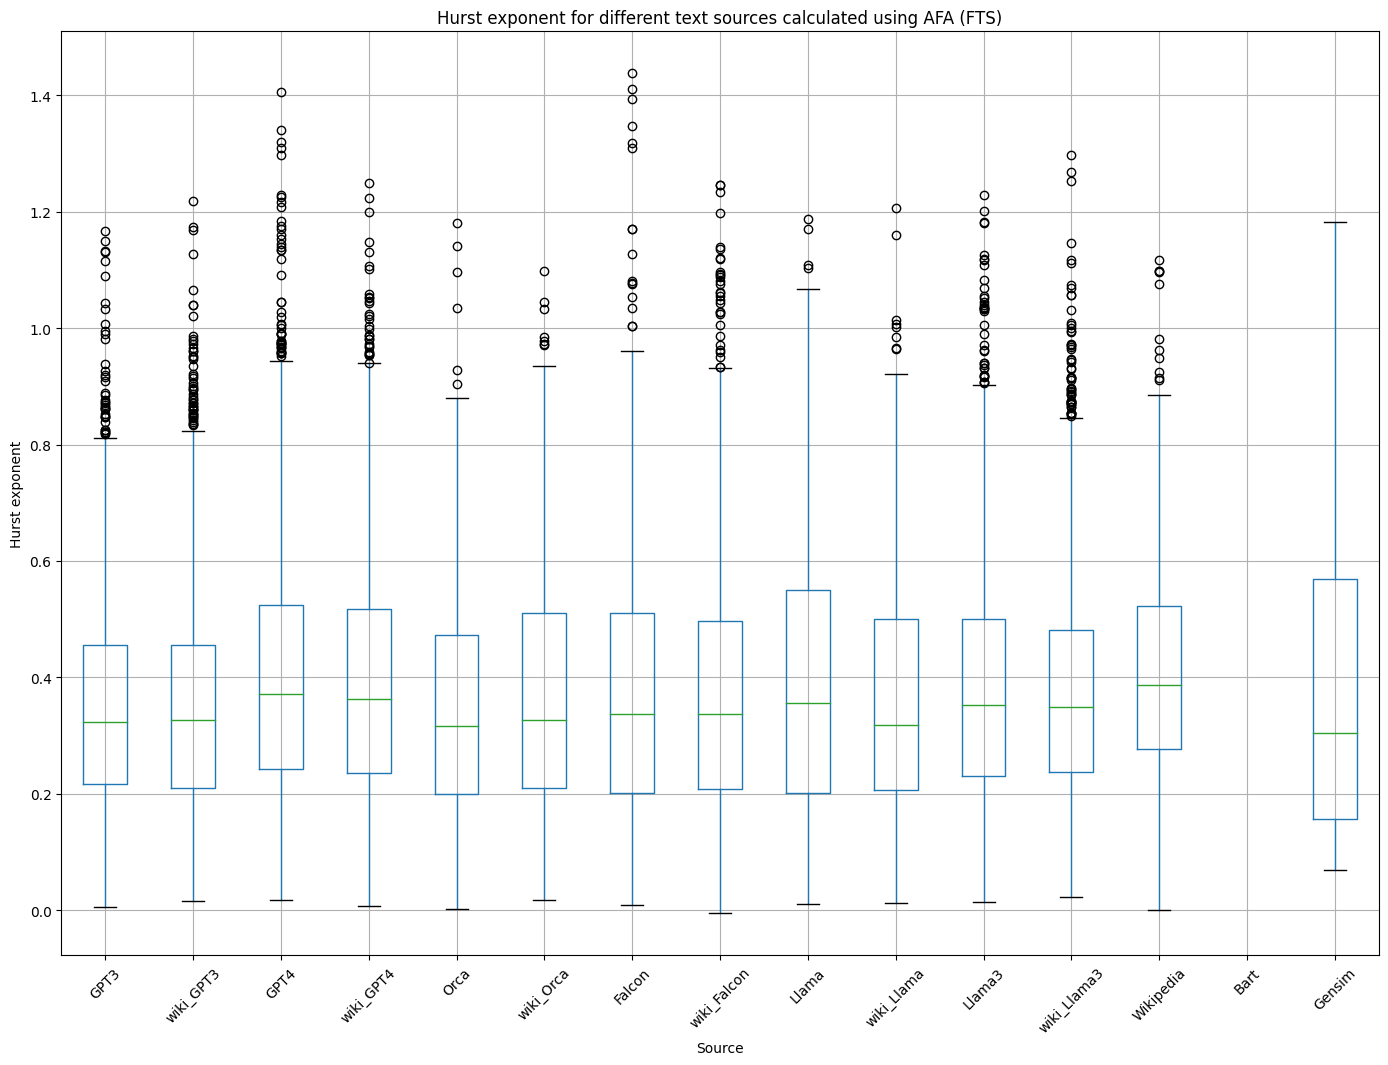

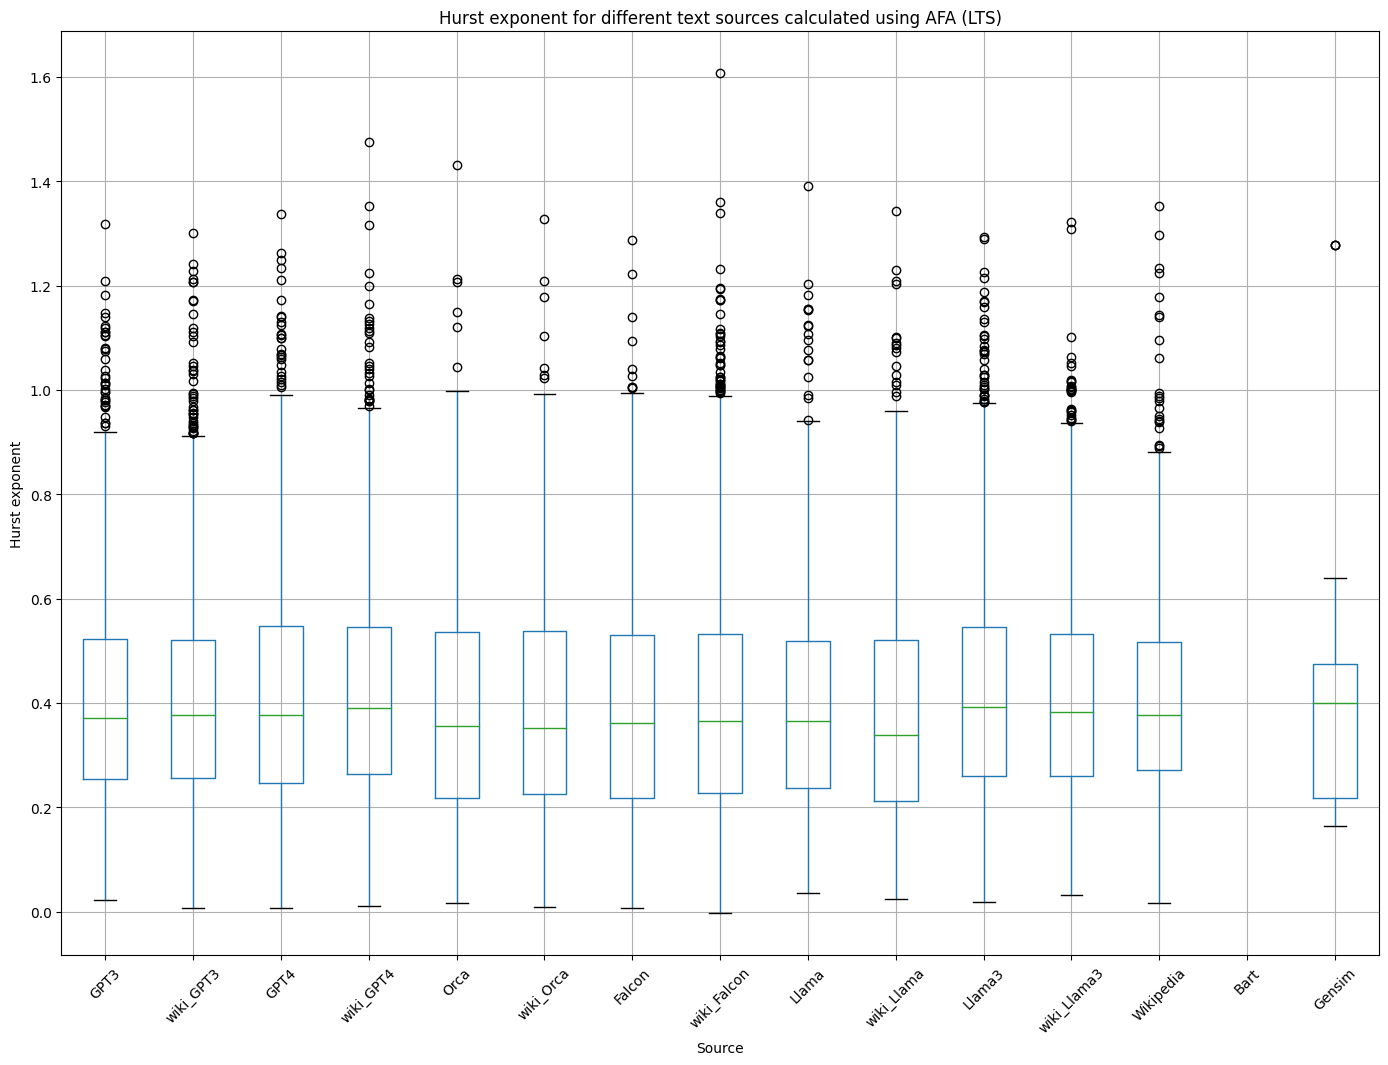

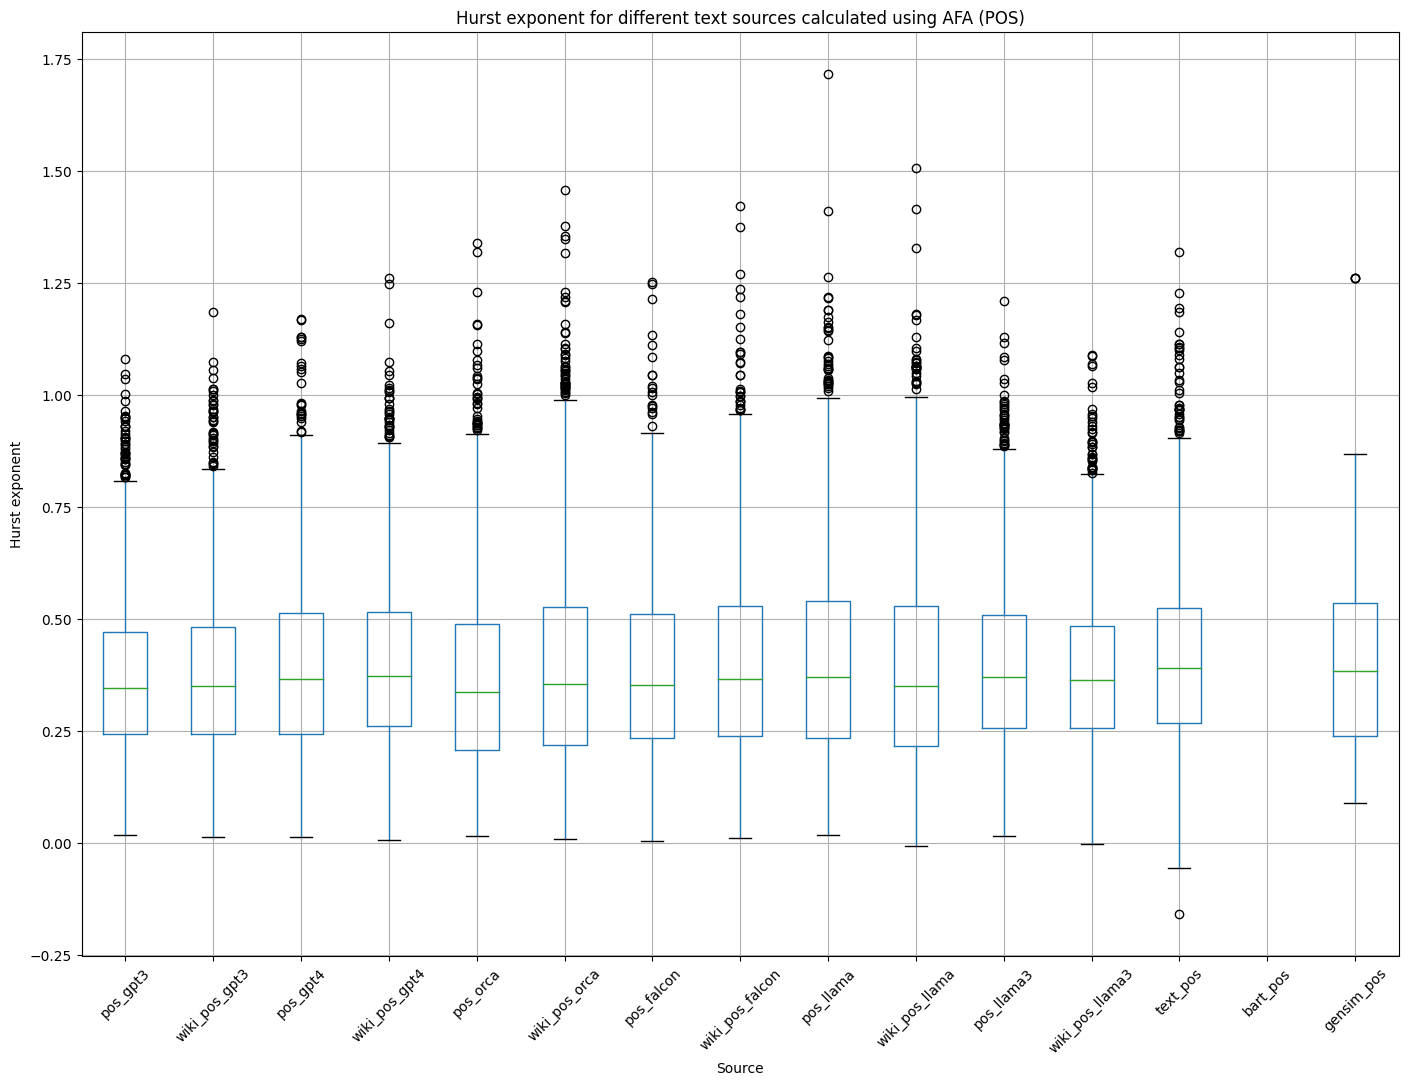

In [75]:
box_plot(h_df_afa_fts, 'AFA (FTS)')
box_plot(h_df_afa_lts, 'AFA (LTS)')
box_plot(h_df_afa_pos, 'AFA (POS)')

RRA

In [76]:
from helpers.TimeSeries import normalize
from helpers.TimeSeries import construct_its_from_normalized_ts
from algorithms.RRA.RRA import perform_rra

def rra_calculate_cell_pos(cell):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    ts_normalized = normalize(cell)
    its = construct_its_from_normalized_ts(ts_normalized)
    estimated_h = perform_rra(its, ts_normalized)
    return estimated_h

In [108]:
from helpers.TimeSeries import normalize
from algorithms.RRA.RRA import perform_rra
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TimeSeries import construct_fts_from_tokens
from helpers.TextManipulations import tokenize_text

def rra_calculate_cell_fts(cell):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    fts = construct_fts_from_tokens(token_words)
    ts_normalized = normalize(fts)
    its = construct_its_from_normalized_ts(ts_normalized)
    estimated_h = perform_rra(its, ts_normalized)
    return estimated_h

In [96]:
from helpers.TimeSeries import normalize
from algorithms.RRA.RRA import perform_rra
from helpers.TextManipulations import perform_text_preprocessing
from helpers.TimeSeries import construct_lts_from_tokens
from helpers.TextManipulations import tokenize_text

def rra_calculate_cell_lts(cell):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    text_cleaned = perform_text_preprocessing(cell)
    token_words = tokenize_text(text_cleaned)
    lts = construct_lts_from_tokens(token_words)
    ts_normalized = normalize(lts)
    its = construct_its_from_normalized_ts(ts_normalized)
    estimated_h = perform_rra(its, ts_normalized)
    return estimated_h

In [97]:
h_df_filename_rra_pos = 'h_df_rra_pos.csv'

def load_or_create_h_df_filename_rra_pos(pos_df_list):
    if os.path.exists(h_df_filename_rra_pos):
        h_df = pd.read_csv(h_df_filename_rra_pos)
    else:
        h_df = pos_df_list.applymap(rra_calculate_cell_pos)   
        h_df.to_csv(h_df_filename_rra_pos, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [102]:
h_df_filename_rra_lts = 'h_df_rra_lts.csv'

def load_or_create_h_df_filename_rra_lts(df_text):
    if os.path.exists(h_df_filename_rra_lts):
        h_df = pd.read_csv(h_df_filename_rra_lts)
    else:
        h_df = df_text.applymap(lambda x: rra_calculate_cell_lts(x) if pd.notnull(x) else x)   
        h_df.to_csv(h_df_filename_rra_lts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [109]:
h_df_filename_rra_fts = 'h_df_rra_fts.csv'

def load_or_create_h_df_filename_rra_fts(df_text):
    if os.path.exists(h_df_filename_rra_fts):
        h_df = pd.read_csv(h_df_filename_rra_fts)
    else:
        h_df = df_text.applymap(lambda x: rra_calculate_cell_fts(x) if pd.notnull(x) else x)      
        h_df.to_csv(h_df_filename_rra_fts, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [104]:
h_df_rra_pos = load_or_create_h_df_filename_rra_pos(pos_df_list)
h_df_rra_pos.info()
h_df_rra_pos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         2438 non-null   float64
 1   wiki_pos_gpt3    2438 non-null   float64
 2   pos_gpt4         2438 non-null   float64
 3   wiki_pos_gpt4    2438 non-null   float64
 4   pos_orca         2438 non-null   float64
 5   wiki_pos_orca    2435 non-null   float64
 6   pos_falcon       2432 non-null   float64
 7   wiki_pos_falcon  2438 non-null   float64
 8   pos_llama        2438 non-null   float64
 9   wiki_pos_llama   2438 non-null   float64
 10  pos_llama3       2438 non-null   float64
 11  wiki_pos_llama3  2438 non-null   float64
 12  text_pos         2438 non-null   float64
 13  bart_pos         2438 non-null   float64
 14  gensim_pos       2418 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.568857,0.625814,0.648996,0.445265,0.577301,0.653786,0.574087,0.670758,0.462178,0.533370,0.615364,0.642561,0.574153,0.780939,0.618909
1,0.513762,0.454937,0.585142,0.487270,0.706383,0.619046,0.644570,0.590531,0.619429,0.660133,0.505824,0.502387,0.530692,0.667083,0.425842
2,0.625112,0.475646,0.616498,0.551816,0.608498,0.596052,0.632380,0.579613,0.614589,0.679210,0.525707,0.487209,0.763292,0.731614,0.808873
3,0.542602,0.506067,0.631895,0.608186,0.517663,0.553370,0.584186,0.622216,0.651382,0.449492,0.549626,0.597593,0.615652,0.533181,0.627242
4,0.517482,0.525610,0.547695,0.507761,0.653373,0.582894,0.580850,0.479076,0.557255,0.606849,0.500859,0.608339,0.714955,0.846917,NaN


In [105]:
h_df_rra_lts = load_or_create_h_df_filename_rra_lts(df_text)
h_df_rra_lts.info()
h_df_rra_lts.head()

/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


returning None from get_h_from_fluctuations, segment_sizes: [], log_segment_values: []
returning None from get_h_from_fluctuations, segment_sizes: [], log_segment_values: []


/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2438 non-null   float64
 5   wiki_Orca    2434 non-null   float64
 6   Falcon       2432 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2438 non-null   float64
 10  Llama3       2438 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart         2438 non-null   float64
 14  Gensim       2418 non-null   float64
dtypes: float64(15)
memory usage: 369.3 KB


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.522335,0.433257,0.638503,0.668732,0.519305,0.321089,0.437310,0.563653,0.462352,0.537756,0.573143,0.501830,0.510151,0.582156,0.518124
1,0.575100,0.648862,0.523750,0.641024,0.569401,0.475555,0.530598,0.488019,0.638996,0.555403,0.569893,0.534832,0.583239,0.595646,0.422380
2,0.480974,0.504511,0.538748,0.565924,0.582168,0.580126,0.573951,0.590639,0.614461,0.578977,0.530061,0.484267,0.572582,0.499100,0.691967
3,0.486081,0.483152,0.428061,0.461571,0.565018,0.638079,0.549253,0.542015,0.552556,0.625273,0.386853,0.559564,0.505923,0.483750,0.446459
4,0.569638,0.562881,0.600891,0.635144,0.559705,0.576457,0.640328,0.494272,0.558576,0.489783,0.615136,0.513907,0.824930,0.603450,NaN


In [110]:
h_df_rra_fts = load_or_create_h_df_filename_rra_fts(df_text)
h_df_rra_fts.info()
h_df_rra_fts.head()

/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))


returning None from get_h_from_fluctuations, segment_sizes: [], log_segment_values: []
returning None from get_h_from_fluctuations, segment_sizes: [], log_segment_values: []


/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty sli

DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GPT3         2438 non-null   float64
 1   wiki_GPT3    2438 non-null   float64
 2   GPT4         2438 non-null   float64
 3   wiki_GPT4    2438 non-null   float64
 4   Orca         2435 non-null   float64
 5   wiki_Orca    2429 non-null   float64
 6   Falcon       2432 non-null   float64
 7   wiki_Falcon  2438 non-null   float64
 8   Llama        2438 non-null   float64
 9   wiki_Llama   2437 non-null   float64
 10  Llama3       2437 non-null   float64
 11  wiki_Llama3  2438 non-null   float64
 12  Wikipedia    940 non-null    float64
 13  Bart         2437 non-null   float64
 14  Gensim       2387 non-null   float64
dtypes: float64(15)
memory usage: 369.3 KB


,GPT3,wiki_GPT3,GPT4,wiki_GPT4,Orca,wiki_Orca,Falcon,wiki_Falcon,Llama,wiki_Llama,Llama3,wiki_Llama3,Wikipedia,Bart,Gensim
0,0.560956,0.603734,0.575469,0.629688,0.576617,0.691175,0.516875,0.529530,0.650713,0.653292,0.543500,0.573605,0.646372,0.508068,0.493322
1,0.518657,0.574706,0.481177,0.545498,0.517508,0.548861,0.650572,0.490978,0.359449,0.458022,0.604354,0.418813,0.522942,0.630305,0.287005
2,0.550323,0.551889,0.581536,0.583947,0.382672,0.535827,0.443937,0.500472,0.454630,0.590437,0.566691,0.573832,0.493988,0.611473,0.588922
3,0.522111,0.423562,0.532031,0.509764,0.514948,0.546231,0.596171,0.477692,0.531504,0.349944,0.516008,0.522294,0.580620,0.655910,0.507184
4,0.486689,0.490127,0.591602,0.677828,0.593218,0.487555,0.546508,0.440625,0.753250,0.585624,0.550733,0.556511,0.830667,0.580964,NaN


In [111]:
outliers = find_outliers(h_df_rra_fts, 2.5)
print_outliers(df, outliers)

NameError: name 'h_df_rra' is not defined

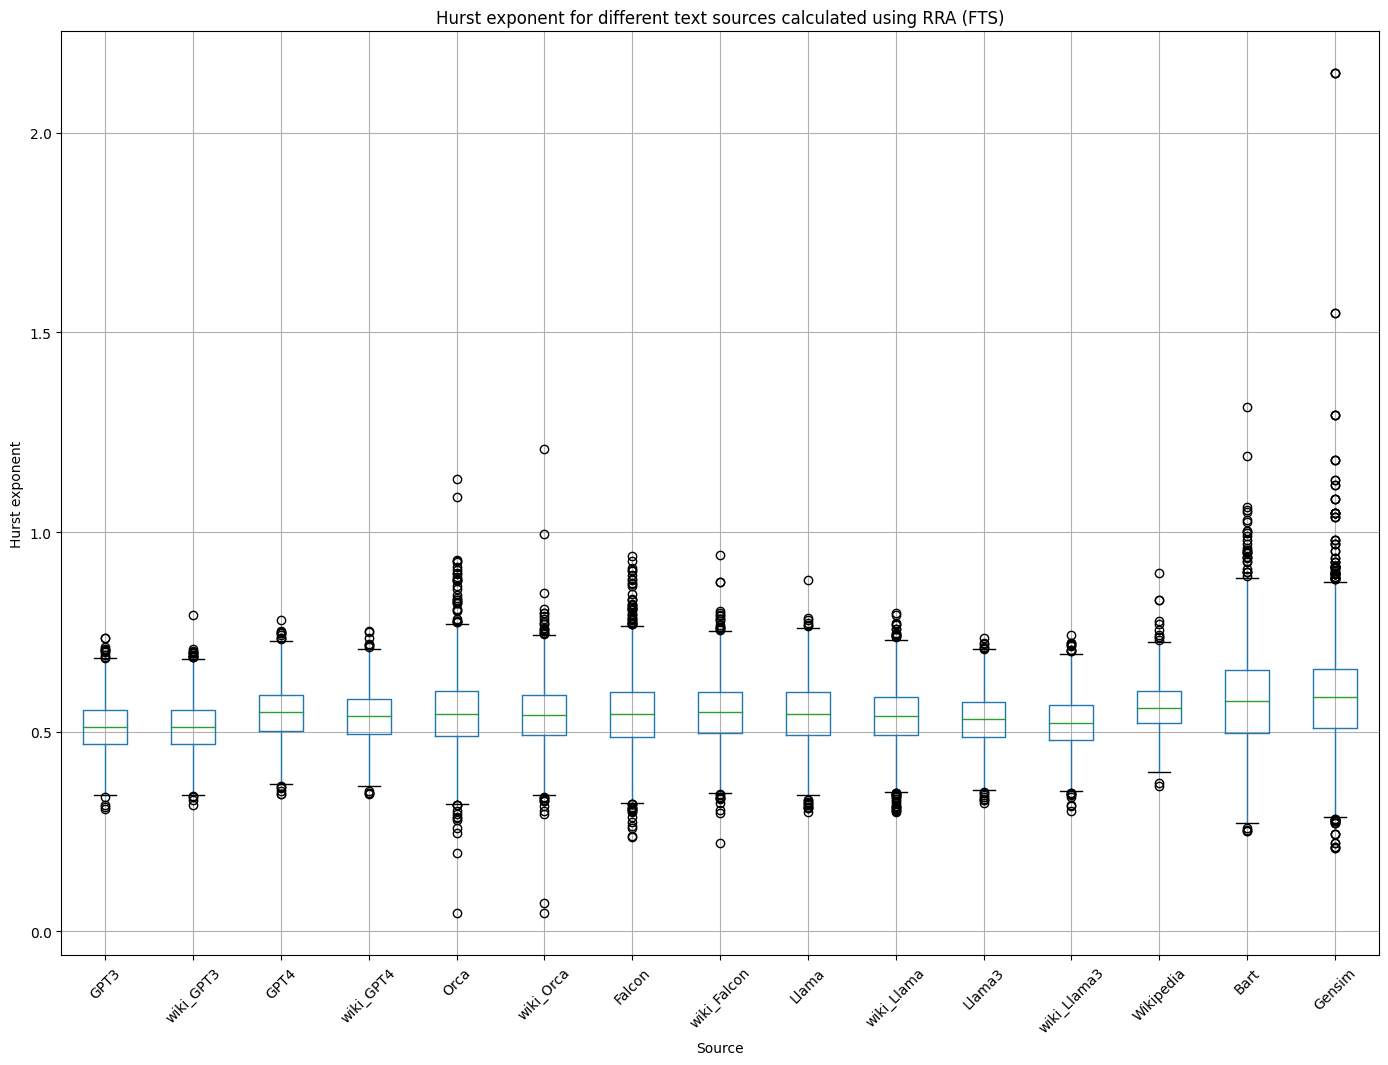

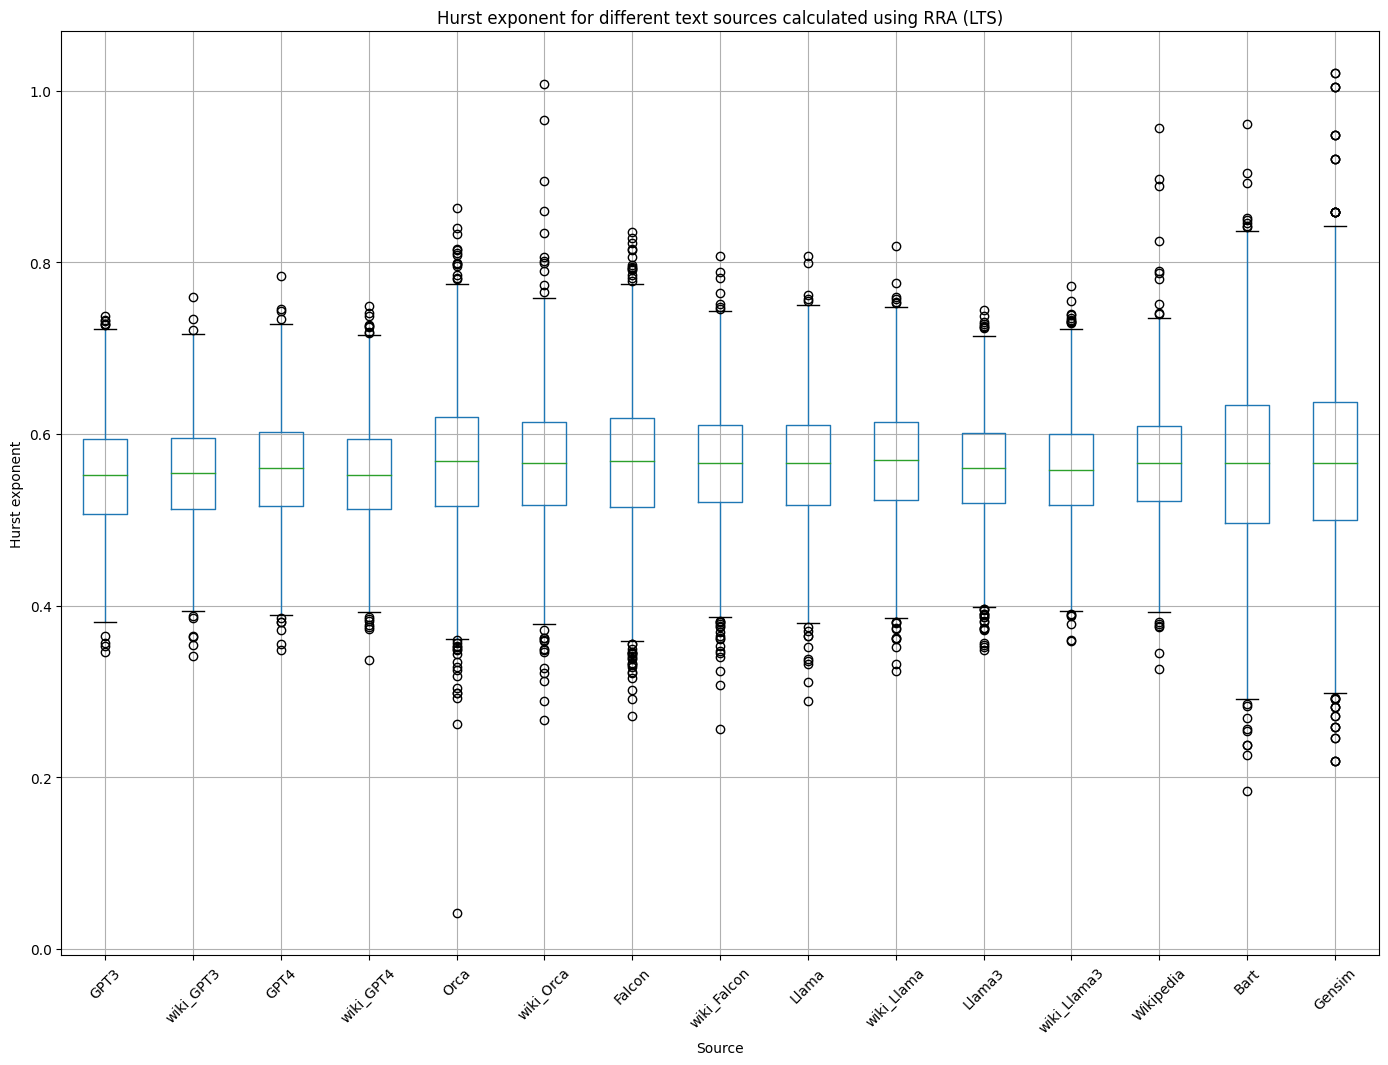

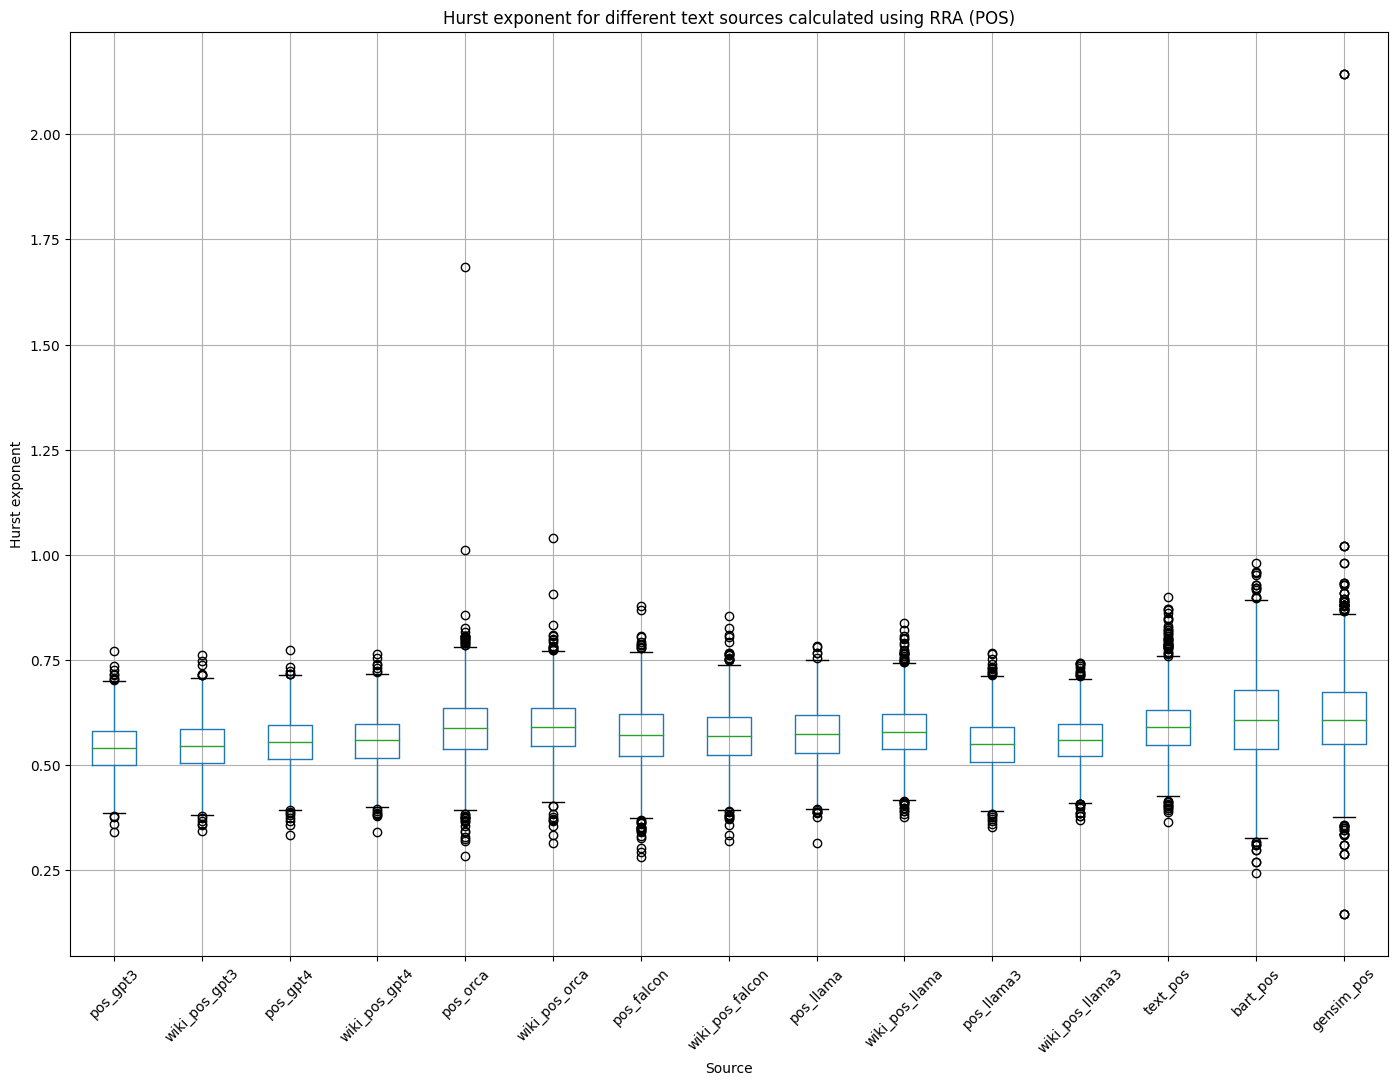

In [112]:
box_plot(h_df_rra_fts, 'RRA (FTS)')
box_plot(h_df_rra_lts, 'RRA (LTS)')
box_plot(h_df_rra_pos, 'RRA (POS)')

Same as above but on combined cells

DFA

In [ ]:
def merge_lists(pos_df_list):
    pos_df_list_combined = pd.DataFrame()
    for col in pos_df_list.columns:
        temp = []
        for cell_value in pos_df_list[col]:
            temp.extend(cell_value)
        pos_df_list_combined[col] = [temp]
    return pos_df_list_combined
        
pos_df_list_combined = merge_lists(pos_df_list)
pos_df_list_combined.info()


In [ ]:
df_text_combined = merge_lists(df_text)
df_text_combined.info()

In [ ]:
h_df_filename_dfa_combined = 'h_df_dfa_combined.csv'

def load_or_create_h_df_filename_dfa_combined(pos_df_list):
    if os.path.exists(h_df_filename_dfa_combined):
        h_df = pd.read_csv(h_df_filename_dfa_combined)
    else:
        h_df = pos_df_list.applymap(lambda x: dfa_calculate_cell(x, [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]))   
        h_df.to_csv(h_df_filename_dfa_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [ ]:
h_df_dfa_combined = load_or_create_h_df_filename_dfa_combined(pos_df_list_combined)
h_df_dfa_combined.info()
h_df_dfa_combined.head()

In [ ]:
plot_scatter(h_df_dfa_combined.values.flatten().tolist(), pos_columns, 'DFA Hurst exponent for different text sources, combined input', 'DFA')

AFA

In [ ]:
h_df_filename_afa_combined = 'h_df_afa_combined.csv'

def load_or_create_h_df_filename_afa_combined(pos_df_list):
    if os.path.exists(h_df_filename_afa_combined):
        h_df = pd.read_csv(h_df_filename_afa_combined)
    else:
        h_df = pos_df_list.applymap(lambda x: afa_calculate_cell(x, [100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 750, 800, 900, 1000, 1100, 1200]))   
        h_df.to_csv(h_df_filename_afa_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [ ]:
h_df_afa_combined = load_or_create_h_df_filename_afa_combined(pos_df_list_combined)
h_df_afa_combined.info()
h_df_afa_combined.head()

In [ ]:
plot_scatter(h_df_afa_combined.values.flatten().tolist(), pos_columns, 'AFA Hurst exponent for different text sources, combined input', 'AFA')

RRA

In [ ]:
from helpers.TimeSeries import construct_its
import os

h_df_filename_rra_combined = 'h_df_rra_combined.csv'

def load_or_create_h_df_filename_rra_combined(pos_df_list):
    if os.path.exists(h_df_filename_rra_combined):
        h_df = pd.read_csv(h_df_filename_rra_combined)
    else:
        h_df = pos_df_list.applymap(rra_calculate_cell)   
        h_df.to_csv(h_df_filename_rra_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [ ]:
h_df_rra_combined = load_or_create_h_df_filename_rra_combined(pos_df_list_combined)
h_df_rra_combined.info()
h_df_rra_combined.head()

In [ ]:
plot_scatter(h_df_rra_combined.values.flatten().tolist(), pos_columns, 'RRA Hurst exponent for different text sources, combined input', 'RRA')